In [ ]:
# This is predecessor code for reading in FITS images taken at different times, and checking 
# differences between the PSFs (there shouldn't be any)

# Created 2021 June 29 by E.S.

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import photutils
from photutils import DAOStarFinder
import numpy as np
import pandas as pd
import glob
import os

In [4]:
stem = "./data/fpr_0972/"
file_list = np.sort(glob.glob(stem + "*fits"))

In [14]:
# read in frames and put them into a bug cube

cube_frames_all = np.zeros((len(file_list),281,281))

for fits_num in range(0,len(file_list)):

    # read in reduced FITS file
    hdul = fits.open(file_list[fits_num])
    image_array = hdul[1].data
    
    # put slice 10 into cube (kind of arbitrary, but is bright)
    cube_frames_all[fits_num,:,:] = image_array[10,:,:]

0
(37, 281, 281)
(10, 281, 281)
1
(37, 281, 281)
(10, 281, 281)
2
(37, 281, 281)
(10, 281, 281)
3
(37, 281, 281)
(10, 281, 281)
4
(37, 281, 281)
(10, 281, 281)
5
(37, 281, 281)
(10, 281, 281)
6
(37, 281, 281)
(10, 281, 281)
7
(37, 281, 281)
(10, 281, 281)
8
(37, 281, 281)
(10, 281, 281)
9
(37, 281, 281)
(10, 281, 281)


In [17]:
# save 

write_file_name = "fpr_0972_cube.fits"
hdu_write = fits.PrimaryHDU(cube_frames_all)
hdul_write = fits.HDUList([hdu_write])
hdul_write.writeto(write_file_name)
print("Wrote out cube of frames as " + write_file_name)

In [26]:
# find variation across slices

noise_vals = np.std(cube_frames_all, axis=0)
median_vals = np.median(cube_frames_all, axis=0)

# find S/N of central region around PSF core
central_s_to_n = np.divide(median_vals[134:163,134:163],noise_vals[134:163,134:163])

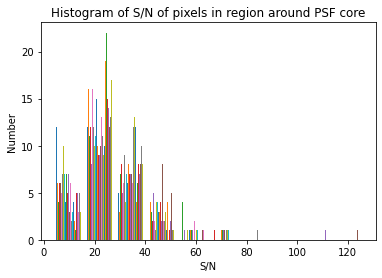

In [29]:
write_hist_name = "fpr_0972_sn_hist.png"

plt.hist(central_s_to_n)
plt.title("Histogram of S/N of pixels in region around PSF core")
plt.xlabel("S/N")
plt.ylabel("Number")
plt.savefig(write_hist_name)